# **CS440 - Problem**

Description:
Given ECG about patients, we need to find common ECGs; In another words, we need to group similar ECGs. However the ECG are Time Series Datasets; thereby traditional techniques could not be applied directly to this problem.

> 

## Step 0:

Framing the problem: Discover Dynamic Measures that help to calculate the distance between the ECG Time Series and Apply k-means, hierarchical clustering, and other techniques on the ECG Time Series.

## Step 1: Discovery

Null values, outliers (DBSCAN for Time Series to check outliers), scaling, correlation, visualizations, etc...

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/ECG5000_TRAIN.csv")

In [ ]:
df.head

<bound method NDFrame.head of      1.00E+00  -1.13E-01  -2.83E+00  -3.77E+00  -4.35E+00  -4.38E+00  \
0         1.0     -1.100     -4.000      -4.29      -4.51      -4.02   
1         1.0     -0.567     -2.590      -3.87      -4.58      -4.19   
2         1.0      0.490     -1.910      -3.62      -4.32      -4.27   
3         1.0      0.800     -0.874      -2.38      -3.97      -4.34   
4         1.0     -1.510     -3.570      -4.48      -4.41      -3.32   
..        ...        ...        ...        ...        ...        ...   
494       4.0     -0.479     -1.780      -2.40      -3.17      -3.56   
495       4.0     -1.330     -2.480      -2.97      -3.34      -3.18   
496       4.0     -0.022     -0.912      -1.90      -2.66      -3.12   
497       5.0      0.288     -1.100      -2.50      -3.60      -3.65   
498       5.0     -1.130     -2.700      -3.12      -3.56      -3.31   

     -3.47E+00  -2.18E+00  -1.82E+00  -1.25E+00  ...  1.60E-01  7.92E-01  \
0        -3.23      -1.57    

In [ ]:
df.describe()

,1.00E+00,-1.13E-01,-2.83E+00,-3.77E+00,-4.35E+00,-4.38E+00,-3.47E+00,-2.18E+00,-1.82E+00,-1.25E+00,...,1.60E-01,7.92E-01,9.34E-01,7.97E-01,5.79E-01,2.58E-01,2.28E-01,1.23E-01,9.25E-01,1.93E-01
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,...,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,-0.014217,0.002183,0.004529,0.004715,0.004929,0.004171,0.002694,-0.002593,-0.005045,-0.003988,...,0.000931,0.001405,0.000396,-0.001133,-0.002714,-0.003122,-0.003716,-0.004564,-0.005136,-0.002925
std,0.960455,0.466103,0.605417,0.750038,0.811017,0.809777,0.680141,0.495206,0.602123,0.634124,...,0.755714,0.830715,0.873338,0.884070,0.887891,0.883719,0.874524,0.833691,0.797517,0.548593
min,-0.697196,-1.218961,-1.321952,-1.374057,-1.217563,-1.178354,-1.276908,-1.039594,-1.397852,-1.579407,...,-2.040232,-2.015281,-1.897186,-1.719586,-1.485520,-1.424457,-1.523091,-1.802596,-1.982326,-2.737017
25%,-0.697196,-0.329963,-0.494576,-0.652059,-0.699354,-0.681023,-0.546606,-0.341826,-0.370778,-0.482079,...,-0.666447,-0.790632,-0.885391,-0.938273,-0.985887,-1.039018,-0.994986,-0.904426,-0.818103,-0.327648
50%,-0.697196,0.017371,0.017804,-0.168014,-0.402912,-0.479785,-0.183112,-0.050970,0.049074,0.098859,...,0.285415,0.414658,0.494741,0.521255,0.523512,0.507164,0.486552,0.431281,0.358628,0.026554
75%,0.630669,0.325889,0.502821,0.688529,0.792212,0.794394,0.522883,0.255216,0.342276,0.423981,...,0.615861,0.675504,0.729182,0.731434,0.743210,0.748773,0.730723,0.687438,0.685804,0.363175
max,3.817546,1.552338,1.281599,1.784737,2.007400,2.023025,2.075012,2.249799,2.238546,1.815175,...,1.066453,1.122553,1.127105,1.168152,1.135604,1.189405,1.134986,1.103834,1.075196,1.489368


*-------normalization--------*

In [ ]:
df = (df - df.mean()) / df.std()

In [ ]:
df.head(2)

,1.00E+00,-1.13E-01,-2.83E+00,-3.77E+00,-4.35E+00,-4.38E+00,-3.47E+00,-2.18E+00,-1.82E+00,-1.25E+00,...,1.60E-01,7.92E-01,9.34E-01,7.97E-01,5.79E-01,2.58E-01,2.28E-01,1.23E-01,9.25E-01,1.93E-01
0,-0.697196,-0.824328,-1.729992,-1.321211,-1.066702,-0.749284,-0.366516,1.026485,1.402313,1.146926,...,0.364454,0.362090,0.466658,0.586149,0.631235,0.665863,0.668091,0.779513,0.886123,-0.439601
1,-0.697196,-0.357302,-0.734600,-1.021271,-1.119503,-0.899990,-0.278129,0.782912,0.538322,0.425000,...,0.999587,0.619023,0.387675,0.330016,0.263196,0.054743,0.189808,0.548073,0.775206,0.267831


*-------visualization--------*

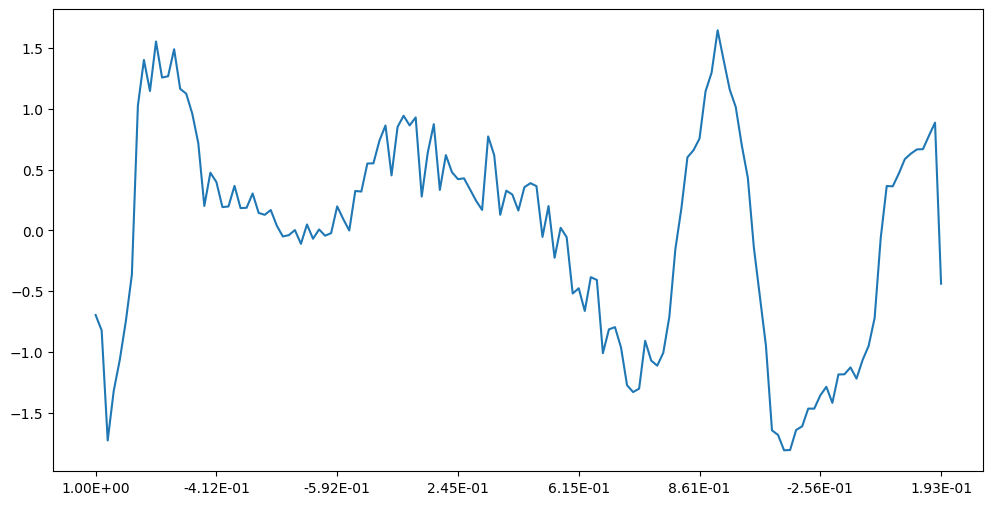

In [ ]:
import matplotlib.pyplot as plt

df.loc[0].plot(figsize=(12,6))
plt.show()

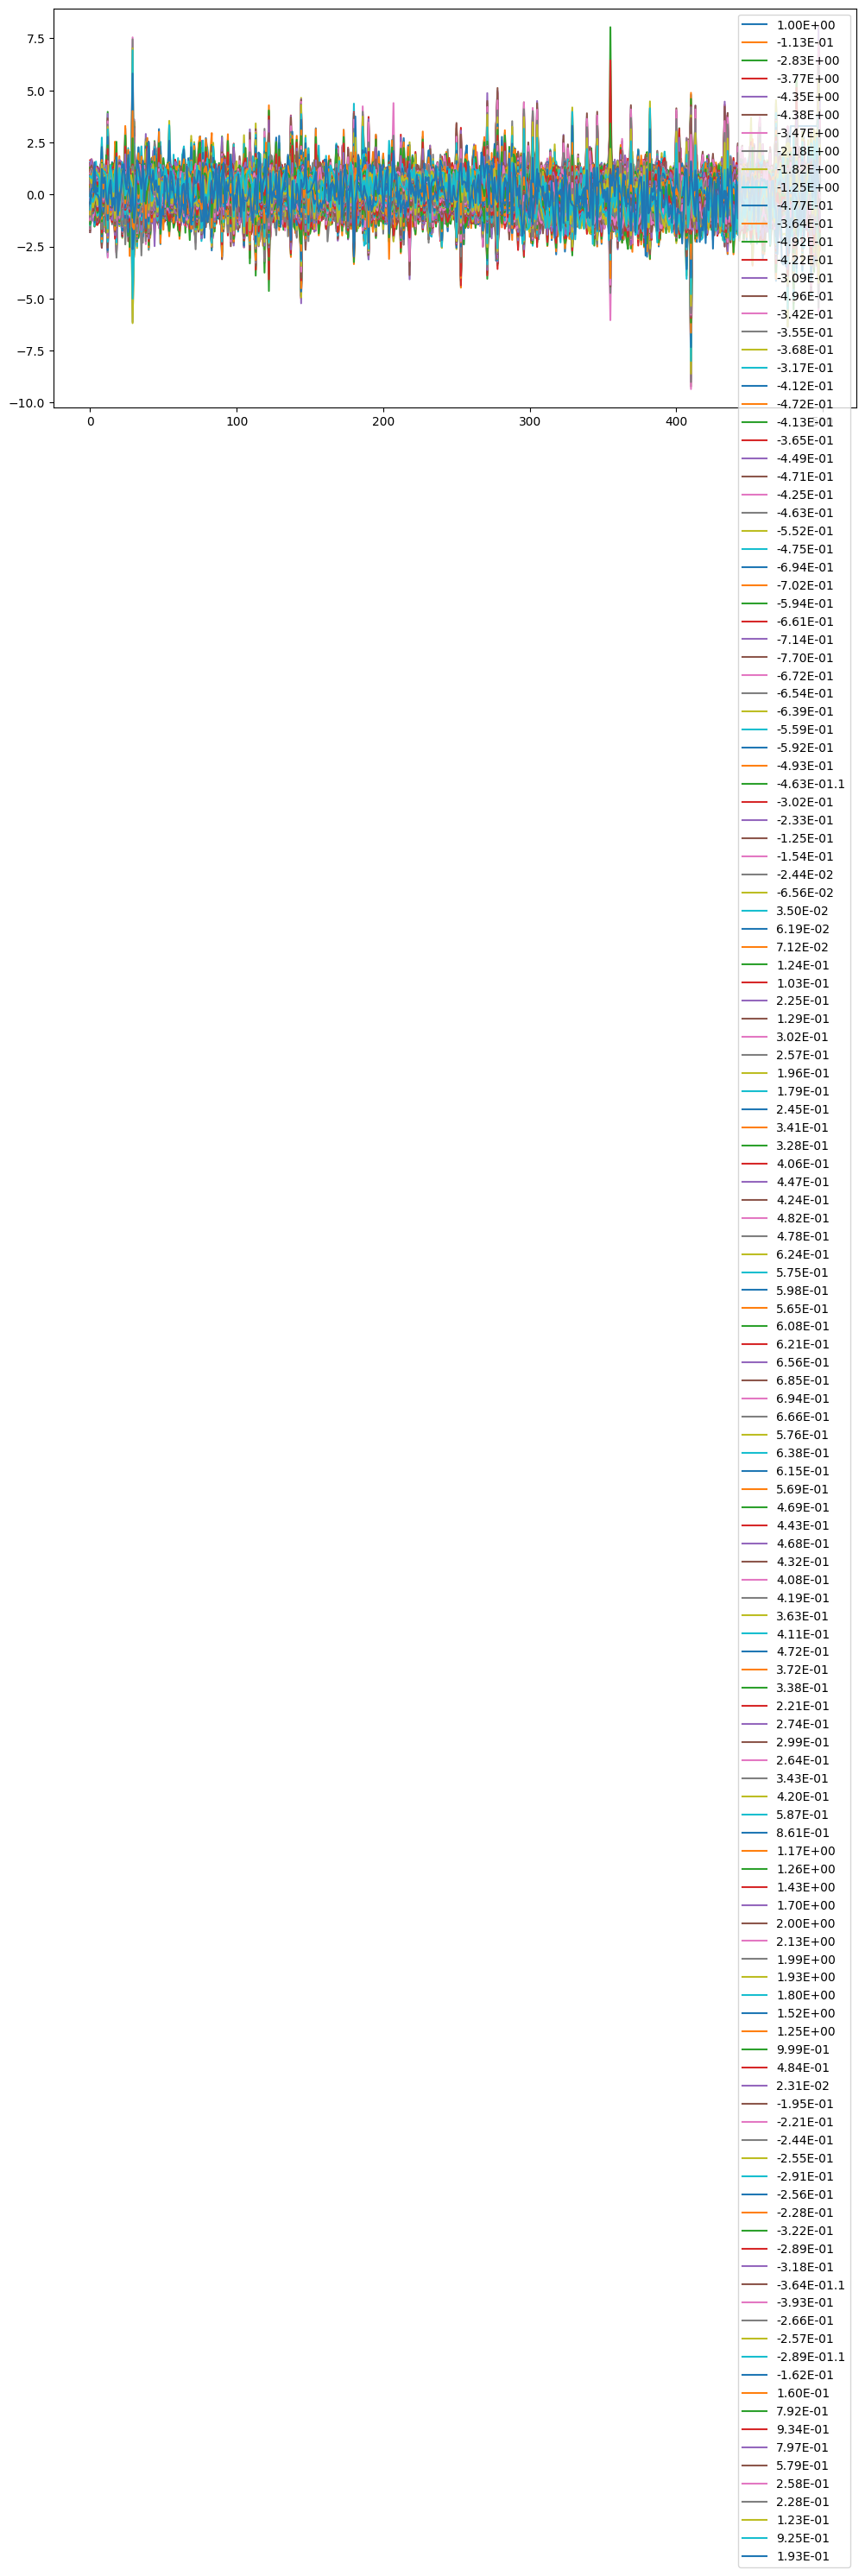

In [ ]:
df.iloc[:1000].plot(figsize=(12,6))
plt.show()

In [ ]:
df = df.rolling(5).mean().dropna()

In [ ]:
df.corr()

,1.00E+00,-1.13E-01,-2.83E+00,-3.77E+00,-4.35E+00,-4.38E+00,-3.47E+00,-2.18E+00,-1.82E+00,-1.25E+00,...,1.60E-01,7.92E-01,9.34E-01,7.97E-01,5.79E-01,2.58E-01,2.28E-01,1.23E-01,9.25E-01,1.93E-01
1.00E+00,1.000000,0.142958,0.586669,0.701431,0.734656,0.736800,0.647504,0.119376,-0.366074,-0.444007,...,-0.587963,-0.641181,-0.672901,-0.688797,-0.703476,-0.710881,-0.716402,-0.718138,-0.729919,-0.421661
-1.13E-01,0.142958,1.000000,0.719618,0.464106,0.344722,0.216148,0.086103,-0.099424,-0.173468,-0.315997,...,-0.327978,-0.291338,-0.257793,-0.243160,-0.226405,-0.201836,-0.186998,-0.188332,-0.186002,0.040857
-2.83E+00,0.586669,0.719618,1.000000,0.926859,0.852783,0.754536,0.580278,0.004531,-0.452816,-0.632611,...,-0.788372,-0.784893,-0.767520,-0.757549,-0.743980,-0.718852,-0.704117,-0.702093,-0.714530,-0.253685
-3.77E+00,0.701431,0.464106,0.926859,1.000000,0.979755,0.928236,0.785570,0.142043,-0.461807,-0.654601,...,-0.891702,-0.906081,-0.903400,-0.902207,-0.894908,-0.878379,-0.864885,-0.856863,-0.860590,-0.378211
-4.35E+00,0.734656,0.344722,0.852783,0.979755,1.000000,0.977744,0.866277,0.231688,-0.427807,-0.619576,...,-0.897055,-0.919616,-0.926334,-0.931020,-0.929120,-0.918181,-0.906546,-0.897215,-0.896009,-0.446206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.58E-01,-0.710881,-0.201836,-0.718852,-0.878379,-0.918181,-0.921603,-0.826841,-0.165779,0.510439,0.653454,...,0.875679,0.926654,0.961847,0.980347,0.993587,1.000000,0.991504,0.963259,0.936950,0.525267
2.28E-01,-0.716402,-0.186998,-0.704117,-0.864885,-0.906546,-0.914058,-0.826493,-0.181927,0.487123,0.623928,...,0.835760,0.889313,0.931451,0.954285,0.973986,0.991504,1.000000,0.986510,0.960127,0.571535
1.23E-01,-0.718138,-0.188332,-0.702093,-0.856863,-0.897215,-0.903070,-0.823435,-0.215986,0.426160,0.564412,...,0.794174,0.842159,0.886408,0.913479,0.937536,0.963259,0.986510,1.000000,0.984680,0.639200
9.25E-01,-0.729919,-0.186002,-0.714530,-0.860590,-0.896009,-0.895050,-0.808037,-0.208800,0.403539,0.549205,...,0.781286,0.826885,0.865455,0.892164,0.914548,0.936950,0.960127,0.984680,1.000000,0.694157


## Step 2: Algorithms and their Results

Apply the TimeSeries Kmeans using the dynamic time warping (that calculates distance) on the dataset and choose a K + check elbow methods to choose the k for the kmeans 

## Step 3: Analysis of the results

Evaluate the results using SSE and the silhouette methods